In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from lightgbm import LGBMClassifier
import lightgbm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.manifold import TSNE

In [2]:
from sklearn.preprocessing import LabelEncoder


def convert_category_into_integer(df: pd.DataFrame, columns: list):

    label_encoders = {}  # 각 열의 LabelEncoder 객체를 저장할 딕셔너리입니다.
    
    for column in columns:
        # 각 열에 대해 LabelEncoder 객체를 생성합니다.
        label_encoder = LabelEncoder()
        
        # LabelEncoder를 사용하여 해당 열의 범주형 데이터를 정수형으로 변환합니다.
        df.loc[:, column] = label_encoder.fit_transform(df[column])
        
        # 변환된 LabelEncoder 객체를 딕셔너리에 저장합니다.
        label_encoders.update({column: label_encoder})
    
    # 변환된 데이터프레임과 LabelEncoder 객체를 포함하는 딕셔너리를 반환합니다.
    return df, label_encoders


In [3]:
seed = 0
data_train = pd.read_csv('./data/train.csv')
data_test = pd.read_csv('./data/test.csv')

In [4]:
data_train_dropna = data_train.dropna()

In [5]:
data_train_dropna_labeled, _ = convert_category_into_integer(data_train_dropna, ('Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus'))

In [6]:
data_train_dropna_labeled[['Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus']]=data_train_dropna_labeled[['Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus']].astype(int)

/var/folders/_v/g1qmsq595kq_fg_zv8n2022h0000gn/T/ipykernel_17288/3957736257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_dropna_labeled[['Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard','NewCellphoneUser','NotNewCellphoneUser','OwnsMotorcycle','HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus']]=data_train_dropna_labeled[['Churn','ServiceArea','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsC

In [7]:
data_train_dropna_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  int64  
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  float64


In [10]:
data = pd.DataFrame()

In [12]:
data['Churn'] = data_train_dropna_labeled['Churn']
data['TotalRecurringCharge'] = data_train_dropna_labeled['TotalRecurringCharge']
data['MonthsInService'] = data_train_dropna_labeled['MonthsInService']
data['CurrentEquipmentDays'] = data_train_dropna_labeled['CurrentEquipmentDays']
data['TotalRecurringCharge'] = data_train_dropna_labeled['TotalRecurringCharge']/data_train_dropna_labeled['CurrentEquipmentDays']
data['DirectorAssistedCalls'] = data_train_dropna_labeled['DirectorAssistedCalls']/data_train_dropna_labeled['CurrentEquipmentDays']
data['OverageMinutes'] = data_train_dropna_labeled['OverageMinutes']/data_train_dropna_labeled['CurrentEquipmentDays']
data['RoamingCalls'] = data_train_dropna_labeled['RoamingCalls']/data_train_dropna_labeled['CurrentEquipmentDays']
data['PercChangeMinutes'] = data_train_dropna_labeled['PercChangeMinutes']/data_train_dropna_labeled['CurrentEquipmentDays']
data['PercChangeRevenues'] = data_train_dropna_labeled['PercChangeRevenues']/data_train_dropna_labeled['CurrentEquipmentDays']
data['DroppedCalls'] = data_train_dropna_labeled['DroppedCalls']/data_train_dropna_labeled['CurrentEquipmentDays']
data['BlockedCalls'] = data_train_dropna_labeled['BlockedCalls']/data_train_dropna_labeled['CurrentEquipmentDays']
data['UnansweredCalls'] = data_train_dropna_labeled['UnansweredCalls']/data_train_dropna_labeled['CurrentEquipmentDays']
data['CustomerCareCalls'] = data_train_dropna_labeled['CustomerCareCalls']/data_train_dropna_labeled['CurrentEquipmentDays']
data['ThreewayCalls'] = data_train_dropna_labeled['ThreewayCalls']/data_train_dropna_labeled['CurrentEquipmentDays']


In [95]:
data = data_train_dropna_labeled[['Churn','TotalRecurringCharge',
'MonthsInService',
'CurrentEquipmentDays']]

In [10]:
data_ = data[data['TotalRecurringCharge']<180]

In [8]:
minmaxscaler_total = MinMaxScaler()


In [9]:
data_train_dropna_labeled.iloc[:] = minmaxscaler_total.fit_transform(data_train_dropna_labeled)

In [11]:
# data_
data_train_dropna_labeled

CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  \
0         0.00000      1        0.024537        0.029759   
1         0.00002      1        0.018836        0.001359   
2         0.00003      0        0.035924        0.001087   
3         0.00005      0        0.071937        0.178285   
4         0.00006      1        0.018958        0.000000   
...           ...    ...             ...             ...   
51035     0.99980      0        0.005018        0.010327   
51037     0.99983      0        0.030979        0.008561   
51040     0.99992      0        0.063568        0.098383   
51041     0.99993      1        0.100573        0.052181   
51043     1.00000      0        0.082420        0.237125   

       TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
0                  0.068966               0.001568        0.000000   
1                  0.056650               0.000000        0.000000   
2                  0.108374               0.000000        0.000000   
3                  0.199507               0.007780        0.000000   
4                  0.056650               0.000000        0.000000   
...                     ...                    ...             ...   
51035              0.088670               0.000000        0.000000   
51037              0.056650               0.000000        0.009951   
51040              0.187192               0.000000        0.000926   
51041              0.088670               0.000000        0.057857   
51043              0.224138               0.006211        0.010414   

       RoamingCalls  PercChangeMinutes  PercChangeRevenues  ...  \
0          0.000000           0.410058            0.303158  ...   
1          0.000000           0.426933            0.308448  ...   
2          0.000000           0.427153            0.308448  ...   
3          0.000000           0.444690            0.310704  ...   
4          0.000000           0.427374            0.308393  ...   
...             ...                ...                 ...  ...   
51035      0.000000           0.427374            0.308448  ...   
51037      0.000000           0.423183            0.304773  ...   
51040      0.000809           0.422962            0.307892  ...   
51041      0.000000           0.427374            0.308448  ...   
51043      0.004225           0.440829            0.312876  ...   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
0                            0.0     0.444444               0   
1                            0.0     0.555556               0   
2                            0.0     0.666667               0   
3                            0.0     0.666667               0   
4                            0.0     1.000000               0   
...                          ...          ...             ...   
51035                        0.0     0.444444               0   
51037                        0.0     0.333333               0   
51040                        0.0     0.777778               0   
51041                        0.0     0.222222               0   
51043                        0.0     1.000000               0   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
0                           0.00      0.533333                        1   
1                           0.00      0.533333                        0   
2                           0.00      1.000000                        0   
3                           0.00      0.000000                        0   
4                           0.04      0.000000                        0   
...                          ...           ...                      ...   
51035                       0.00      1.000000                        0   
51037                       0.00      1.000000                        0   
51040                       0.00      1.000000                        0   
51041                       0.00      0.533333                        0   
51043                       0.04  

In [7]:
# data = data_train_dropna_labeled[['Churn',
# 'CurrentEquipmentDays']]

In [25]:
# data['NewTotalRecurringCharge'] = pd.qcut(data['TotalRecurringCharge'], 7, labels = [1, 2, 3, 4, 5, 6,7])
# data['NewMonthsInService'] = pd.qcut(data['MonthsInService'], 7, labels = [1, 2, 3, 4, 5, 6,7])
# data['NewCurrentEquipmentDays'] = pd.qcut(data['CurrentEquipmentDays'], 7, labels = [1, 2, 3, 4, 5, 6,7])

/var/folders/_v/g1qmsq595kq_fg_zv8n2022h0000gn/T/ipykernel_15851/1241834006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NewTotalRecurringCharge'] = pd.qcut(data['TotalRecurringCharge'], 7, labels = [1, 2, 3, 4, 5, 6,7])
/var/folders/_v/g1qmsq595kq_fg_zv8n2022h0000gn/T/ipykernel_15851/1241834006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NewMonthsInService'] = pd.qcut(data['MonthsInService'], 7, labels = [1, 2, 3, 4, 5, 6,7])
/var/folders/_v/g1qmsq595kq_fg_zv8n2022h0000gn/T/ipyke

In [29]:
# data[['NewTotalRecurringCharge','NewMonthsInService','NewCurrentEquipmentDays']] = data[['NewTotalRecurringCharge','NewMonthsInService','NewCurrentEquipmentDays']].astype(int)

/var/folders/_v/g1qmsq595kq_fg_zv8n2022h0000gn/T/ipykernel_15851/3516048012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['NewTotalRecurringCharge','NewMonthsInService','NewCurrentEquipmentDays']] = data[['NewTotalRecurringCharge','NewMonthsInService','NewCurrentEquipmentDays']].astype(int)


In [12]:
data_.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49730 entries, 0 to 51043
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Churn                  49730 non-null  int64  
 1   TotalRecurringCharge   49730 non-null  float64
 2   MonthsInService        49730 non-null  int64  
 3   CurrentEquipmentDays   49730 non-null  float64
 4   DirectorAssistedCalls  49730 non-null  float64
 5   OverageMinutes         49730 non-null  float64
 6   RoamingCalls           49730 non-null  float64
 7   PercChangeMinutes      49730 non-null  float64
 8   PercChangeRevenues     49730 non-null  float64
 9   DroppedCalls           49730 non-null  float64
 10  BlockedCalls           49730 non-null  float64
 11  UnansweredCalls        49730 non-null  float64
 12  CustomerCareCalls      49730 non-null  float64
 13  ThreewayCalls          49730 non-null  float64
dtypes: float64(12), int64(2)
memory usage: 5.7 MB


In [31]:
# data['totalsum'] = data['NewTotalRecurringCharge']+data['NewMonthsInService']+data['NewCurrentEquipmentDays']

/var/folders/_v/g1qmsq595kq_fg_zv8n2022h0000gn/T/ipykernel_15851/1401490158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['totalsum'] = data['NewTotalRecurringCharge']+data['NewMonthsInService']+data['NewCurrentEquipmentDays']


In [18]:
train, valid = train_test_split(data, random_state=seed, test_size=0.3)

In [84]:
# svc = SVC()

In [85]:
# svc.fit(train.drop(columns= 'Churn'),train['Churn'])

SVC()

In [86]:
# print(
# classification_report(
#     valid.Churn,
#     svc.predict(valid.drop(columns='Churn'))
# )
# )

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     10621
           1       0.00      0.00      0.00      4305

    accuracy                           0.71     14926
   macro avg       0.36      0.50      0.42     14926
weighted avg       0.51      0.71      0.59     14926



/opt/homebrew/Caskroom/miniconda/base/envs/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [97]:
# t_sns = TSNE(n_components=3)
# data_tsne_transformed = t_sns.fit_transform(data_train_dropna_labeled.drop(columns='Churn'))
# data_tsne_transformed = pd.DataFrame(data_tsne_transformed, columns=['TSNE1','TSNE2','TSNE3'])
# data_tsne_transformed = pd.concat([
#     data_tsne_transformed,
#     data_train_dropna_labeled.filter(items=['Churn'])
#     ],
#     axis=1
# )
# px.scatter_3d(
#     data_tsne_transformed,
#     x='TSNE1',
#     y='TSNE2',
#     z='TSNE3',
#     color='Churn'
# )

In [14]:
lgbm = LGBMClassifier(random_state=seed)

In [19]:
lgbm.fit(train.drop(columns= 'Churn'),train['Churn'])

[LightGBM] [Info] Number of positive: 9940, number of negative: 24886
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3116
[LightGBM] [Info] Number of data points in the train set: 34826, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285419 -> initscore=-0.917738
[LightGBM] [Info] Start training from score -0.917738


LGBMClassifier(random_state=0)

In [20]:
(lgbm.predict(valid.drop(columns='Churn')) == valid.Churn).mean()

0.710840144713922

In [21]:
print(
classification_report(
    valid.Churn,
    lgbm.predict(valid.drop(columns='Churn'))
)
)

              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10621
           1       0.48      0.04      0.07      4305

    accuracy                           0.71     14926
   macro avg       0.60      0.51      0.45     14926
weighted avg       0.65      0.71      0.61     14926



In [69]:
Churn1 =  data_[data_['Churn']==1]
Churn0 =  data_[data_['Churn']==0]

<Axes: xlabel='TotalRecurringCharge', ylabel='Density'>

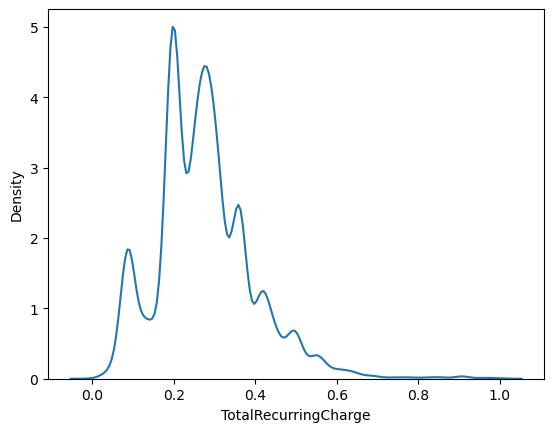

In [71]:
sns.kdeplot(x="TotalRecurringCharge", data=Churn1)

<Axes: xlabel='TotalRecurringCharge', ylabel='Density'>

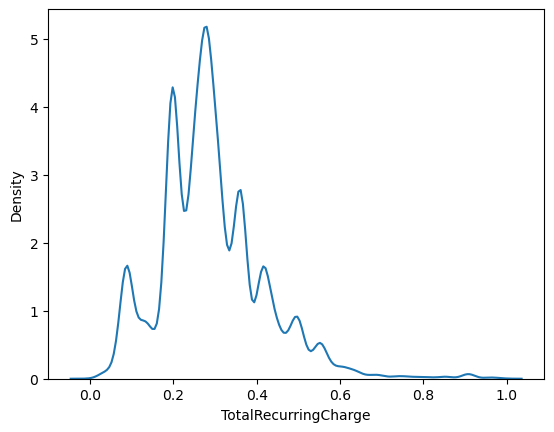

In [72]:
sns.kdeplot(x="TotalRecurringCharge", data=Churn0)